# Project: Investigate a Dataset - [TMDB Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is a dataset of more than 10000 movies  


### Question(s) for Analysis
- How did run time of movies changed over the years?
- Which genre had the most profit?
- Which genre is the most popular?
- Which production company made the most movies?
- Which actor performed the most?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
df.shape #checking number of rows and columns in the dataset

(10866, 21)

the data has 10866 rows and 21 columns

In [4]:
df.dtypes #checking columns data types and

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As we can the median of the budget and revenue is 0 there must be something wrong and the min runtime is 0 we need to check that also.

In [6]:
(df.runtime <= 0).sum()

31

In [7]:
((df.revenue_adj == 0).sum()/df.revenue_adj.count())*100, ((df.budget_adj == 0).sum()/df.budget_adj.count())*100

(55.365359838026876, 52.42039388919566)

55% of the data have 0 budget and 52%  of the data have 0 revenue there must be a problem when entering its values to the dataset

In [8]:
df.isnull().sum() #checking which variables has missing values and how much is it

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As we can see no numeric data is missing so we can fill the other missing data with a common value like unknown.

In [9]:
df.duplicated().sum()

1

There is only 1 duplicated item in the datset


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop_duplicates(inplace=True) #removing duplicate values

In [11]:
df.drop(['imdb_id','homepage','tagline','overview','revenue','budget','keywords','id'], axis=1, inplace=True) #removing unwanted variables for our analysis

In [12]:
df.fillna('unknown', inplace=True) #fillinf na values with unknown in the dataframe

In [13]:
df.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

There is no missing data in the dataset now

In [14]:
df['profit'] = df.revenue_adj - df.budget_adj #Calculating profit column

In [15]:
#splitting the different genres to different rows to have better analysis on individual genres
genre_df  =df.assign(genres=df.genres.str.split('|')).explode('genres') 
genre_df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [16]:
#splitting the different cast to different rows to have better analysis on individual cast members
cast_df = df.assign(cast= df.cast.str.split('|')).explode('cast') 
cast_df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [17]:
#splitting the different production companies to different rows to have better analysis on individual company
companies_df = df.assign(production_companies= df.production_companies.str.split('|')).explode('production_companies') 
companies_df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How did run time of movies changed over the years?)

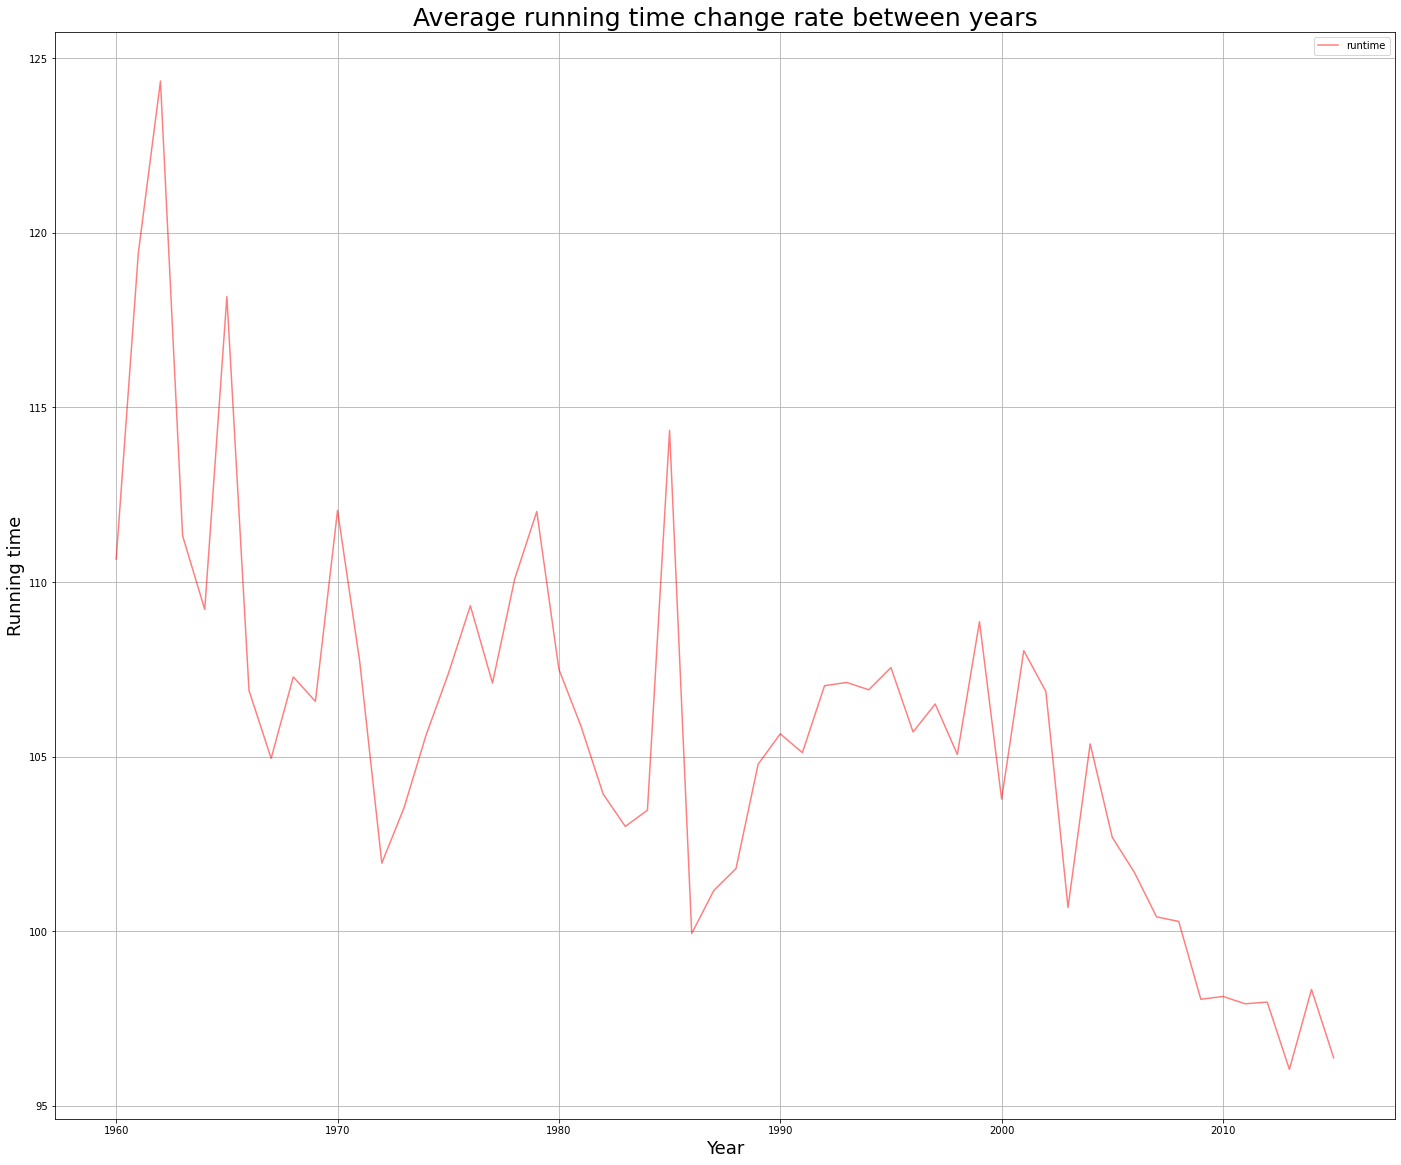

In [18]:
plt.figure(figsize=(24,20))
df.groupby('release_year').mean().sort_values(by='release_year', ascending=False).runtime.plot(color='red', alpha=0.5)
plt.title('Average running time change rate between years',fontsize=25)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Running time', fontsize=18)
plt.legend()
plt.grid(True)
plt.show();

It looks like the running time is **decreased significantly** over the years

### Research Question 2 (Which genre had the most profit?)

In [19]:
genre_df.genres.value_counts()#Number of each genre in the dataset

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
unknown              23
Name: genres, dtype: int64

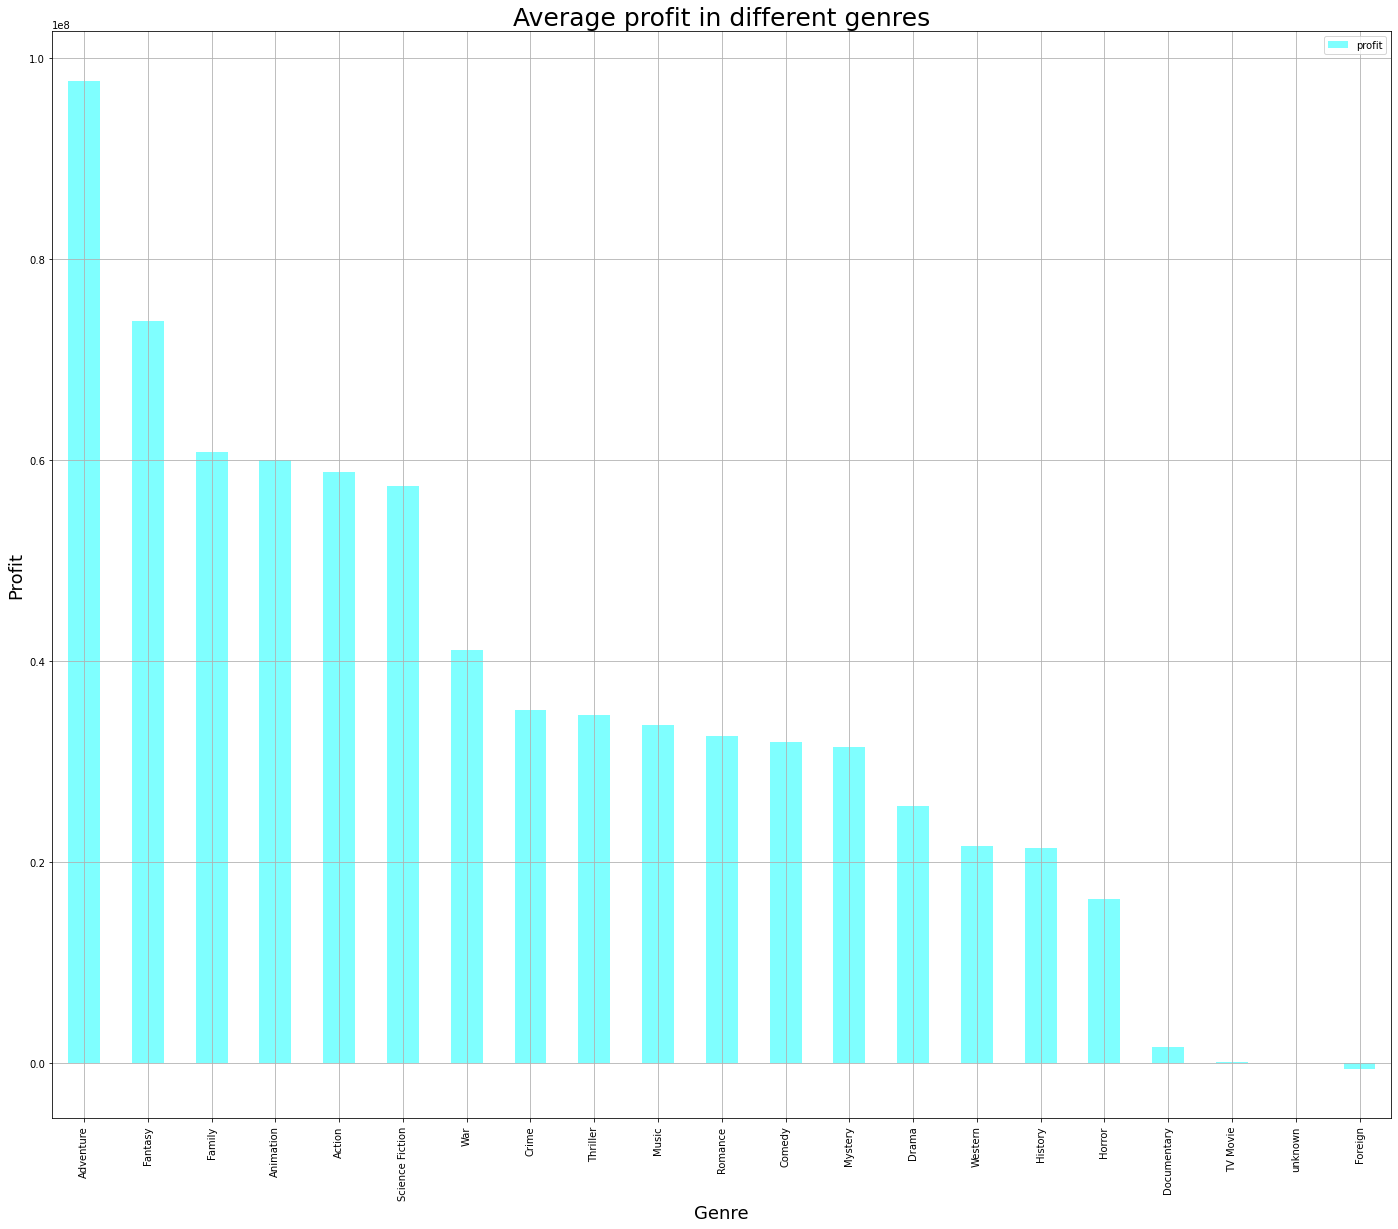

In [20]:
plt.figure(figsize=(24,20))
genre_df.groupby('genres').mean().sort_values(by='profit', ascending=False).profit.plot(kind='bar', color='cyan', alpha=0.5)
plt.title('Average profit in different genres', fontsize=25)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.legend()
plt.grid(True)
plt.show();

It seems like some genres had more profit than others the most profiable genre is **adventure** and the least is **TV Movie**

#### Movies average run time for each genre

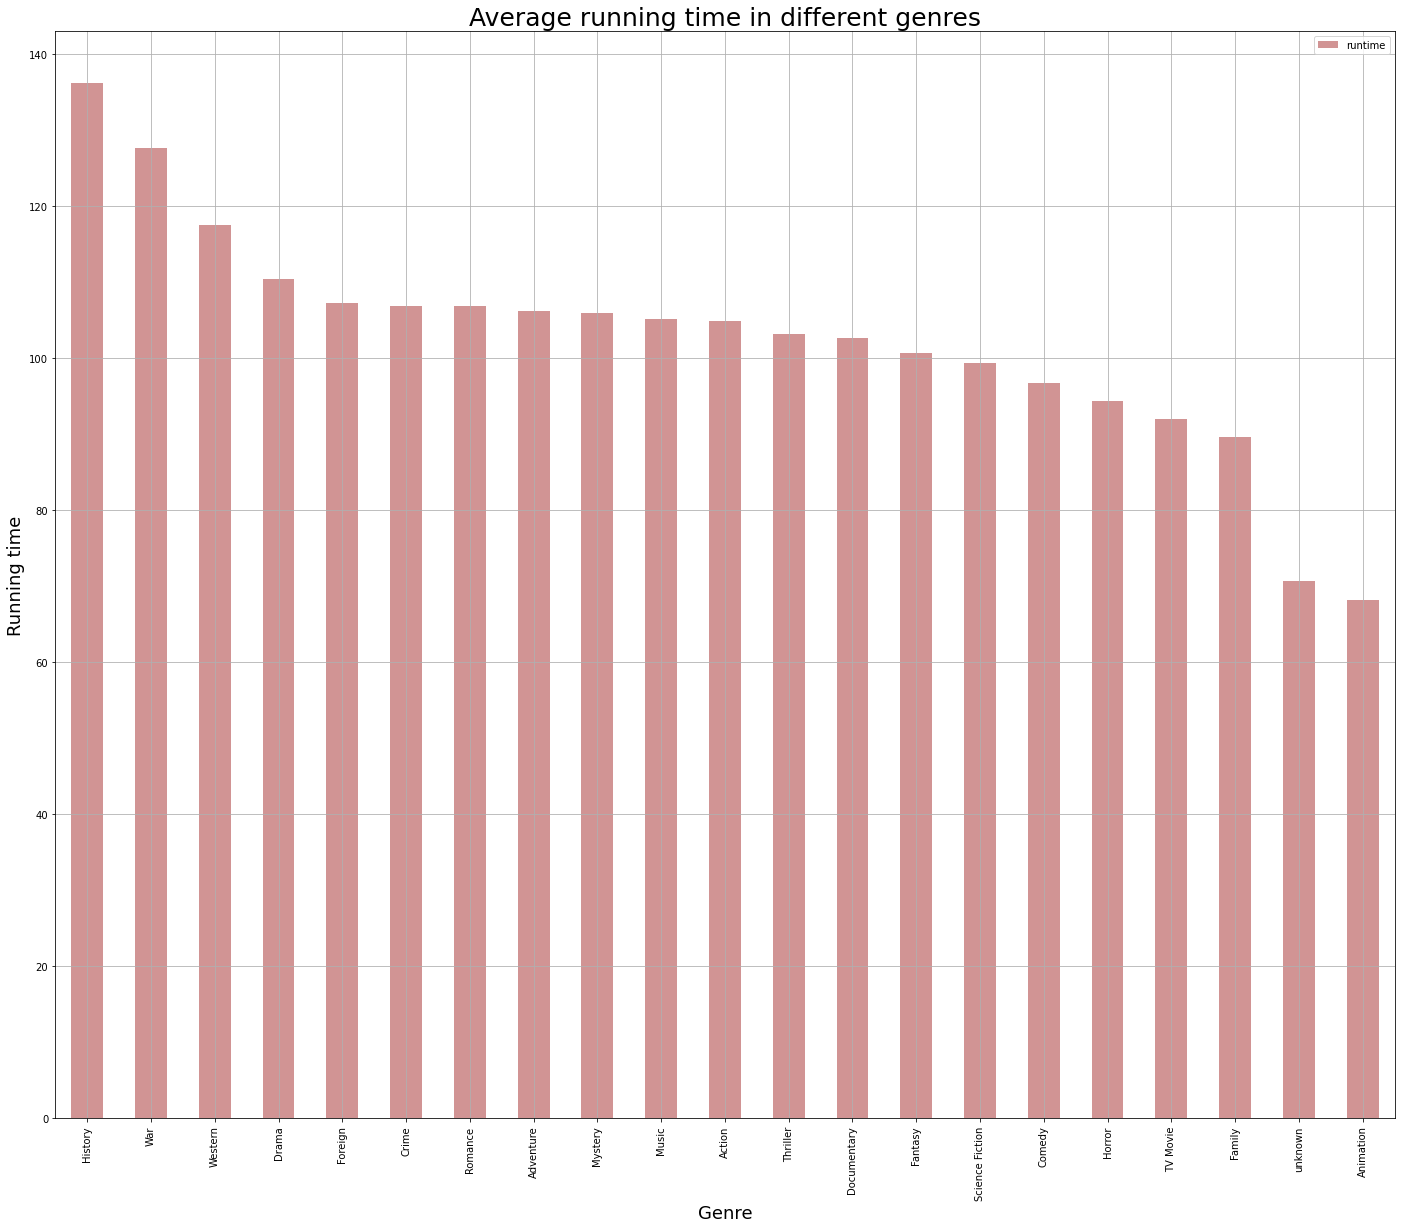

In [21]:
plt.figure(figsize=(24,20))
genre_df.groupby('genres').mean().sort_values(by='runtime', ascending=False).runtime.plot(kind='bar', color='brown', alpha=0.5)
plt.title('Average running time in different genres', fontsize=25)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Running time', fontsize=18)
plt.legend()
plt.grid(True)
plt.show();

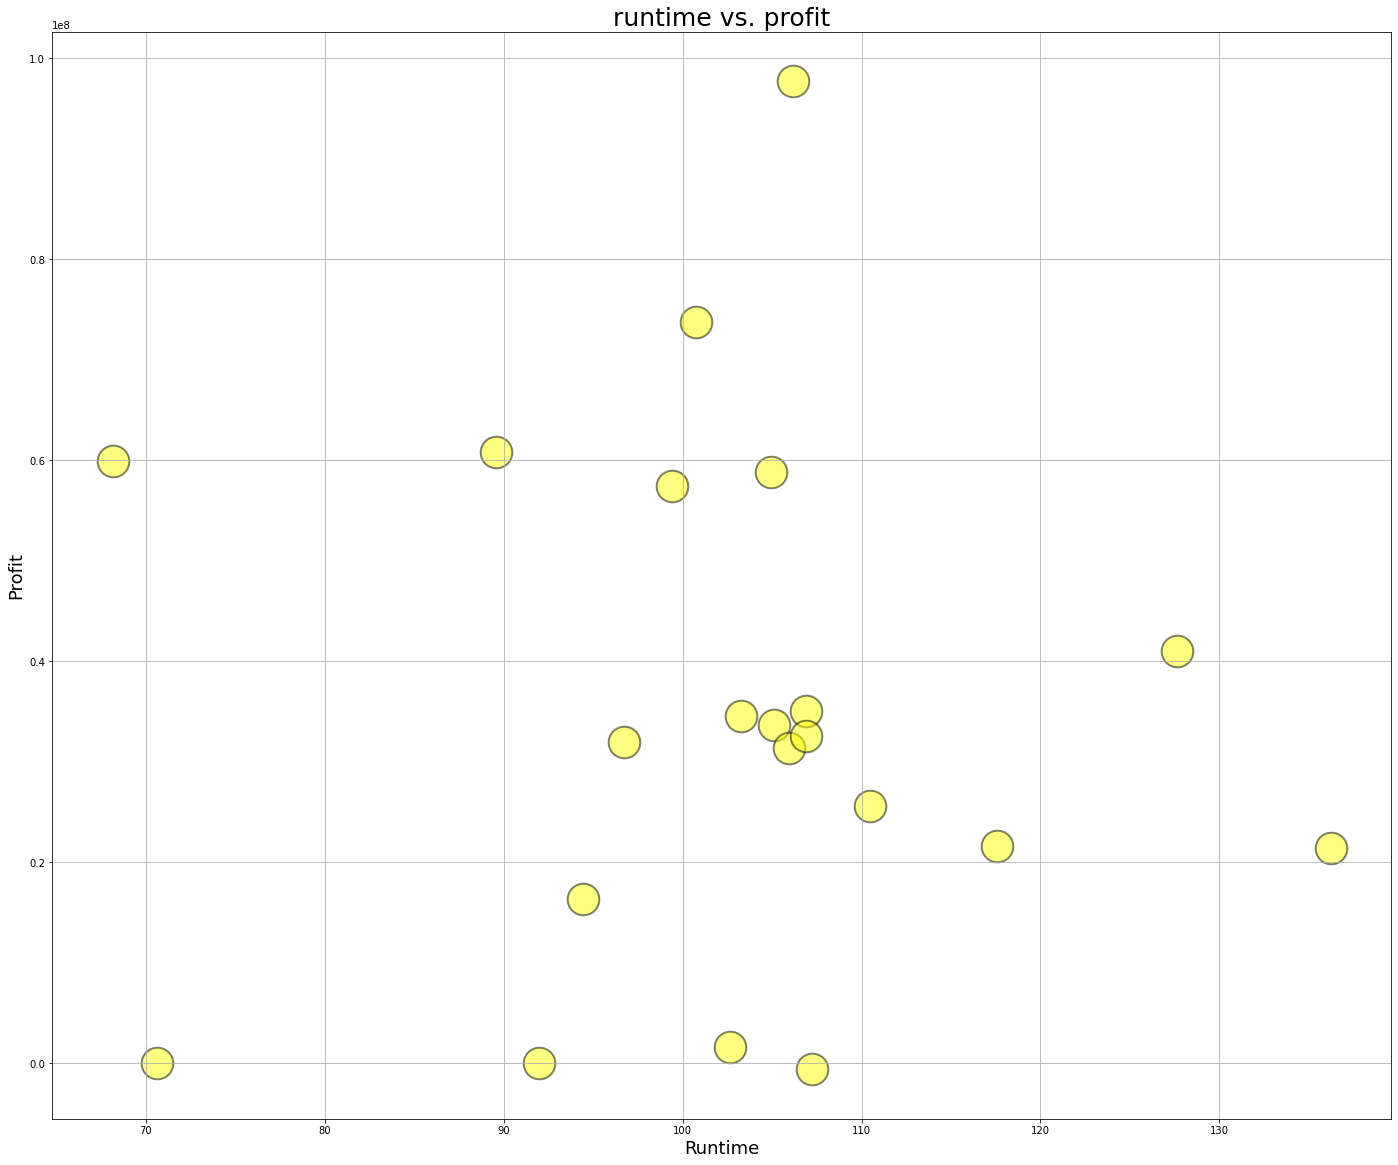

In [22]:
plt.figure(figsize=(24,20))
x1= genre_df.groupby('genres').mean().runtime
y1= genre_df.groupby('genres').mean().profit
plt.scatter(x=x1, y=y1, s=1000, c='yellow', edgecolor='black',linewidth=2, alpha=0.5)
plt.title('runtime vs. profit', fontsize=25)
plt.xlabel('Runtime', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.grid(True)
plt.show();


It seems that median running time (100-110) movies  have the best profit than the other movies

### Research Question 3 (Which genre is the most popular?)

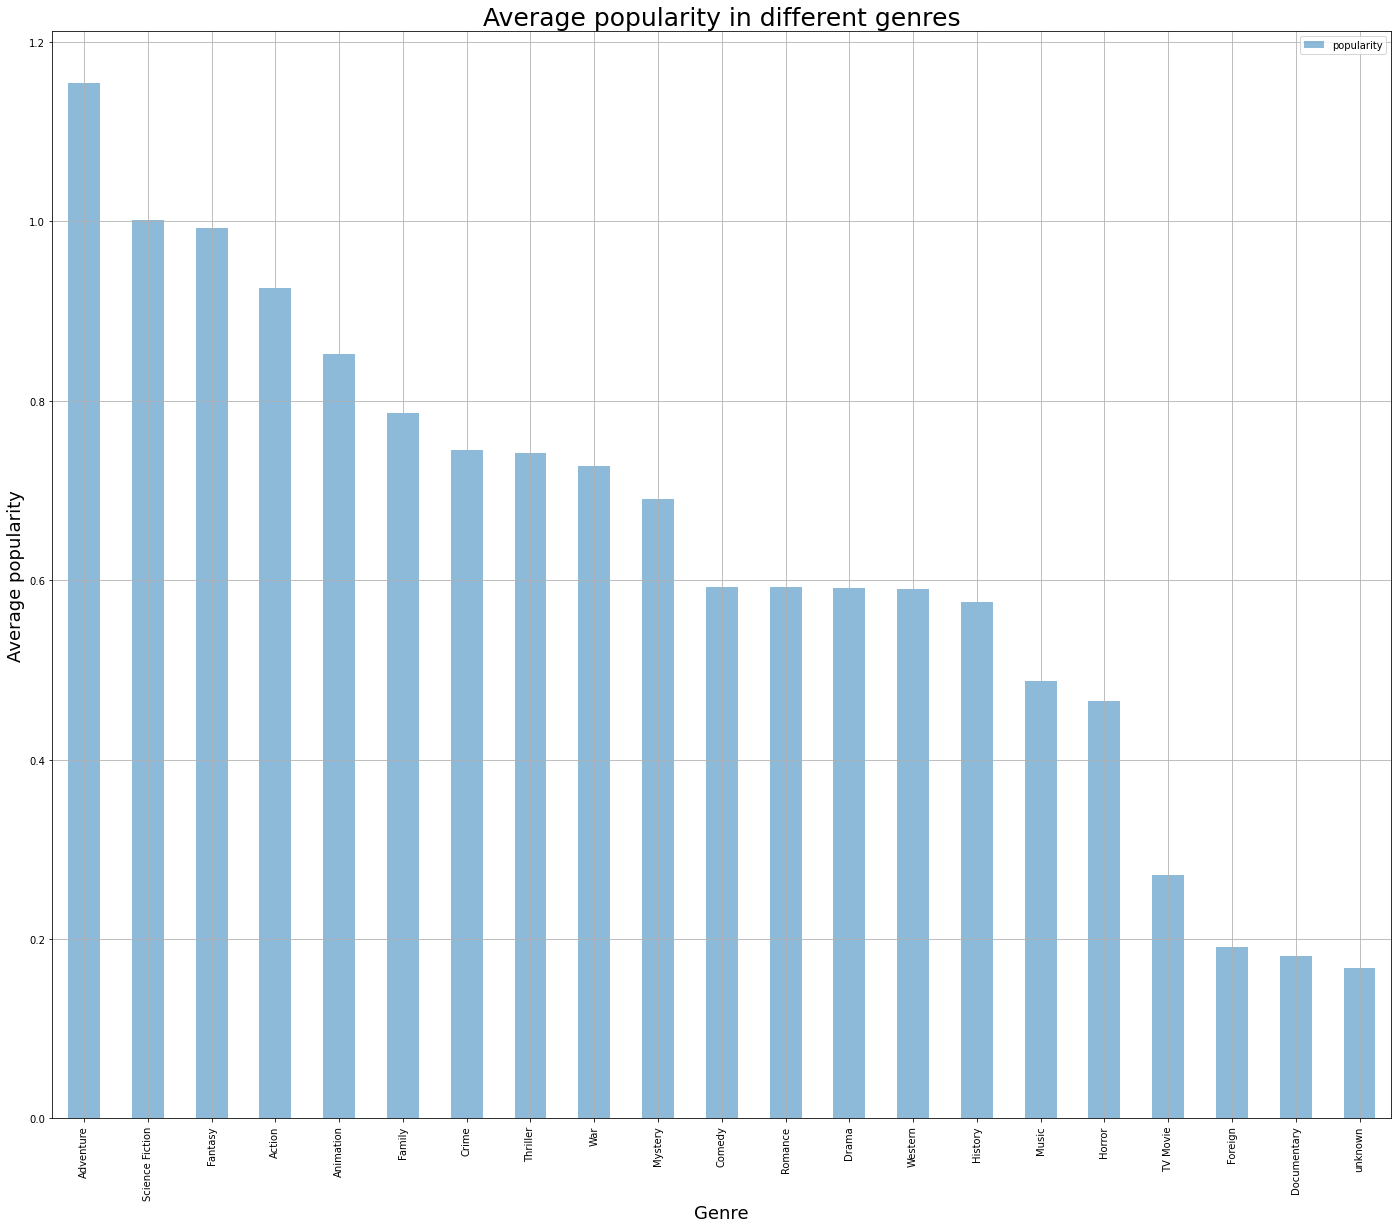

In [23]:
plt.figure(figsize=(24,20))
genre_df.groupby('genres').mean().sort_values(by='popularity', ascending=False).popularity.plot(kind='bar', alpha=0.5)
plt.title('Average popularity in different genres', fontsize=25)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Average popularity', fontsize=18)
plt.legend()
plt.grid(True)
plt.show();

It seems that **adventure** genre is the most popular also maybe there is a correlation betweeen popularity and profit

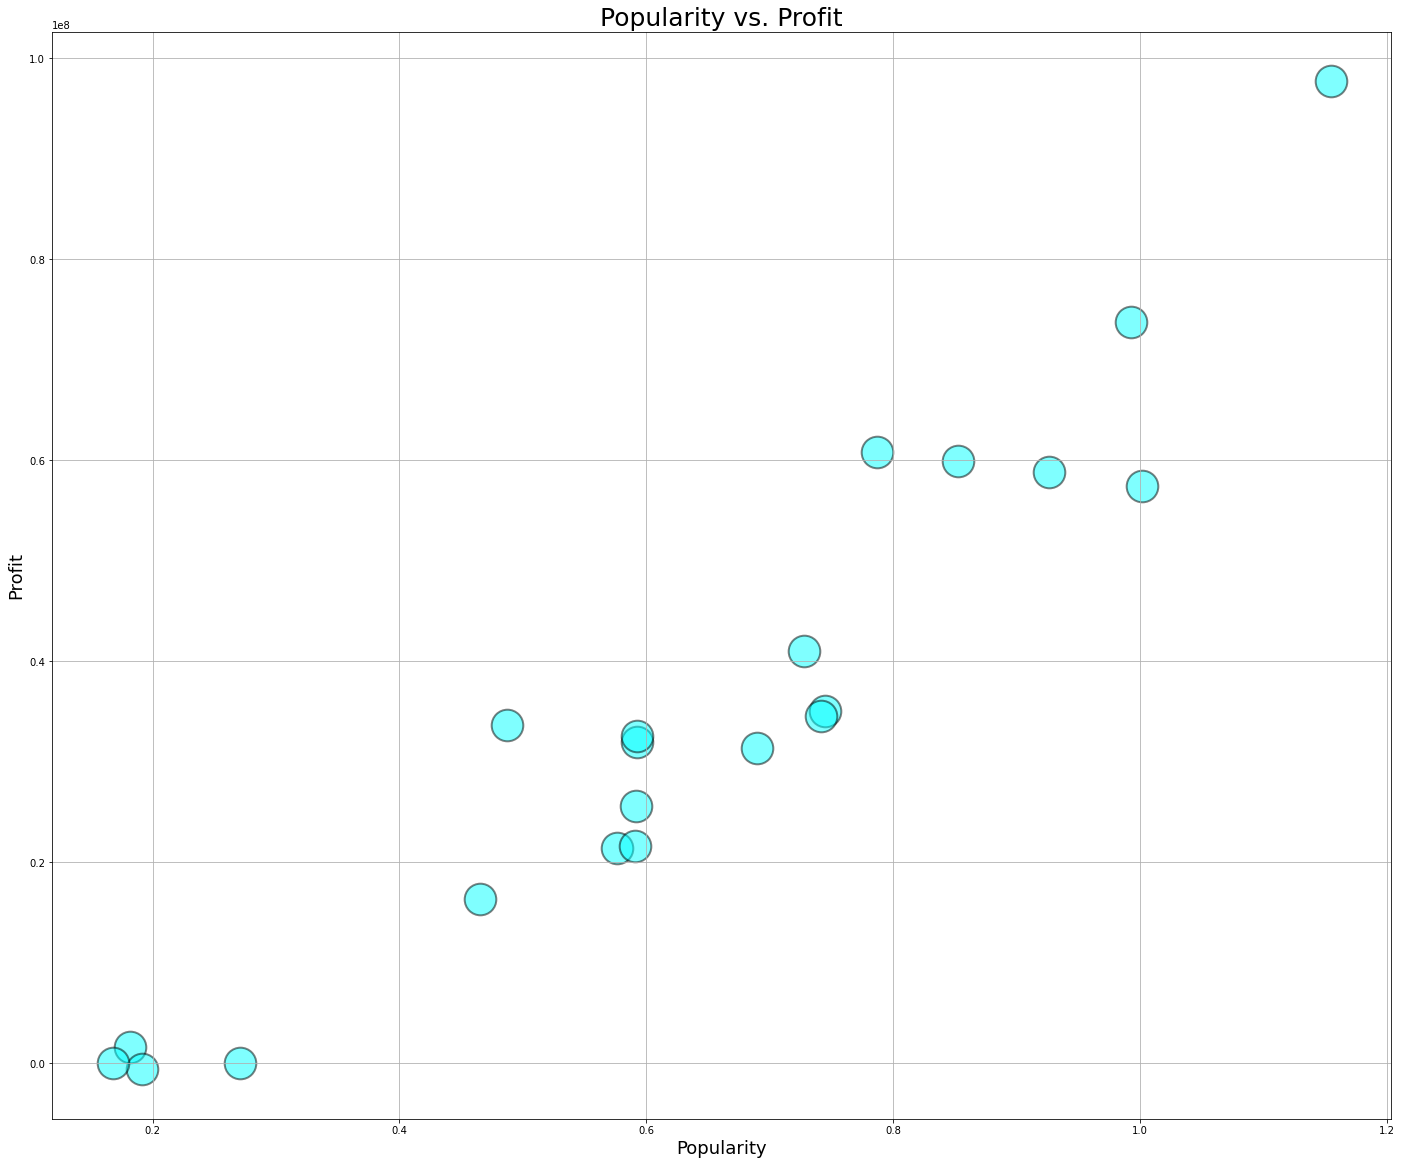

In [24]:
plt.figure(figsize=(24,20))
x1= genre_df.groupby('genres').mean().popularity
y1= genre_df.groupby('genres').mean().profit
plt.scatter(x=x1, y=y1, s=1000, c='cyan', edgecolor='black',linewidth=2, alpha=0.5)
plt.title('Popularity vs. Profit', fontsize=25)
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.grid(True)
plt.show();

There is a **positive correlation** between **popularity** and **profit** so the more popular genres got more profit than the others

### Research Question 4 (Which production company made the most movies?)

In [25]:
companies_df.production_companies.value_counts().to_frame()

,production_companies
unknown,1030
Universal Pictures,522
Warner Bros.,509
Paramount Pictures,431
Twentieth Century Fox Film Corporation,282
...,...
CineEvelyn,1
Silver Sphere Corporation,1
MGM,1
Keystone Pictures,1


It seems that **Universal Pictures** made the most films

### Research Question 5 (Which actor performed the most?)

In [26]:
cast_df.cast.value_counts().to_frame()

,cast
unknown,76
Robert De Niro,72
Samuel L. Jackson,71
Bruce Willis,62
Nicolas Cage,61
...,...
Aran Bell,1
Rebecca Houseknecht,1
Joan Sebastian Zamora,1
Miko Fogarty,1


It seems that **Robert De Niro and Samuel L. Jackson** performed the most.

<a id='conclusions'></a>
## Conclusions

- The most profitable genre is **adventure** and it also were the most **popular** 

- The movies who had a **higher popularity had more profit**

- It seems **longer** movies had **lower** profits **than shorter or median**  running time movies

- The most movies made by a production company are **(Universal Pictures, Warner Bros., Paramount Pictures)**

- The most acted actors are **( Robert De Niro, Samuel L. Jackson,Bruce Willis ,Nicolas Cage)**

## Limitations

Almost 52 % of budget data is zero which affects profit calculation greatly. also with zero revenue, s0 63% of profit is wrongly calculated

I could have dropped them but that will only let 37% of the data to work with which will make the results not accurate and will  not be representative for the entire population